##Linear Support Vector Machine(SVM) Classification (Linear SVC)

In [130]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

###loads the iris dataset, scales the features, and then trains a linear SVM model

The LinearSVC class regularizes the bias term, so you should center
the training set first by subtracting its mean. This is automatic if
you scale the data using the StandardScaler. Moreover, make sure
you set the loss hyperparameter to "hinge", as it is not the default
value. Finally, for better performance you should set the dual
hyperparameter to False, unless there are more features than
training instances

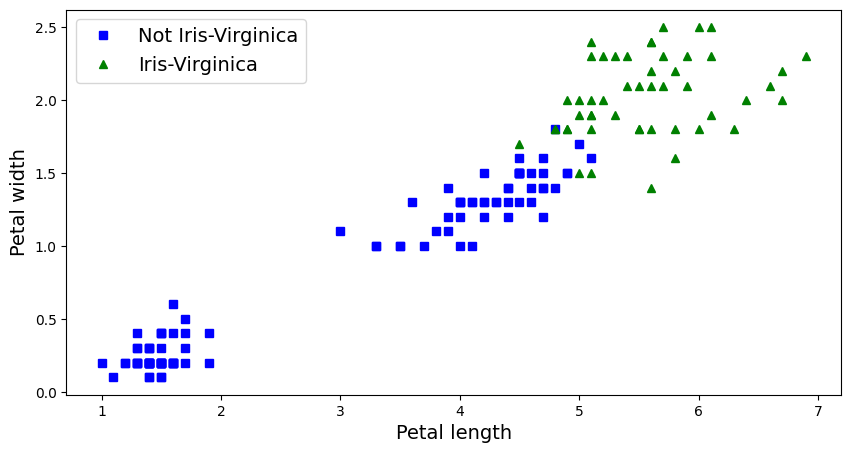

In [168]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

# Define a function to plot the dataset
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Not Iris-Virginica")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend()

# Plot the dataset and the decision boundary
plt.figure(figsize=(10, 5))
plot_dataset(X, y)
plt.show()

In [132]:
svm_clf.predict([[5.5, 1.7]])#Unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class


array([ True])

In [133]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [134]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

You can use the SGDClassifier from the sklearn.linear_model module in Python to train a linear SVM classifier.

In [135]:
from sklearn.linear_model import SGDClassifier

# Define your features and labels
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

# SGDClassifier is initialized with the 'loss' parameter set to 'hinge' which correspnds to linear SVM.
#the penalty is set to 12 which is a standard regularizer for linear SVM models
#max_iter is max no of passes over training data (epochs) to to1 is the stopping criterion

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, tol=0.01)

# Fit the model
clf.fit(X, y)

# Now you can use clf to predict new values
print(clf.predict([[2., 2.]]))

[False]


##Non-linear SVM Classification (Non Linear SVC):

Many datasets are not event close to being linearly seperable. One way to make the dataset linearly seperable is by adding more features, such as polymonial features to result a linearly seperable dataset.

using Scikit-Learn, you can create a Pipeline containing a
PolynomialFeatures transformer (discussed in “Polynomial Regression” on page
130), followed by a StandardScaler and a LinearSVC.

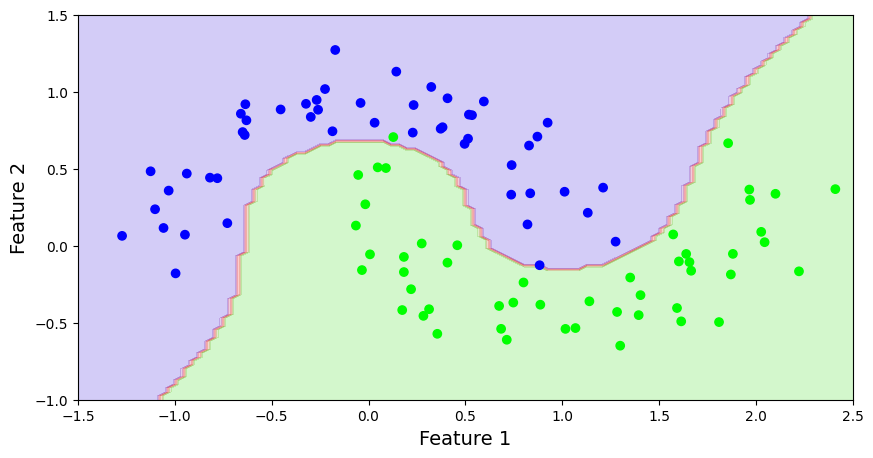

In [150]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)


# Define a function to plot the decision boundary
def plot_decision_boundary(clf, X, y, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_mesh = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_mesh).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary
plt.figure(figsize=(10, 5))
plot_decision_boundary(polynomial_svm_clf, X, y, [-1.5, 2.5, -1, 1.5])


###Polynomial Kernal
Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.
Fortunately, when using SVMs you can apply an almost miraculous mathematical
technique called the kernel trick (it is explained in a moment). It makes it possible to
get the same result as if you added many polynomial features, even with very highdegree polynomials, without actually having to add them. So there is no combinato‐
rial explosion of the number of features since you don’t actually add any features. This
trick is implemented by the SVC class.

In [137]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

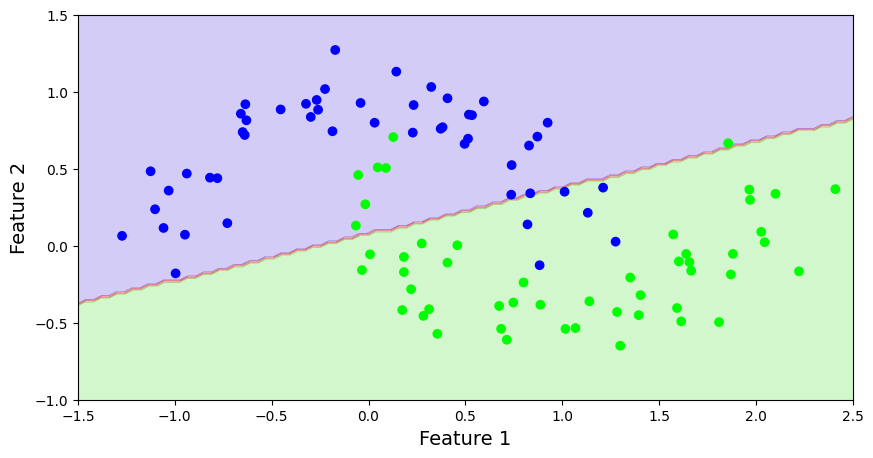

In [138]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=1, coef0=1, C=5))#1st degree polynomial kernel
 ])
poly_kernel_svm_clf.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(10, 5))
plot_decision_boundary(poly_kernel_svm_clf, X, y, [-1.5, 2.5, -1, 1.5])
#shows underfitting

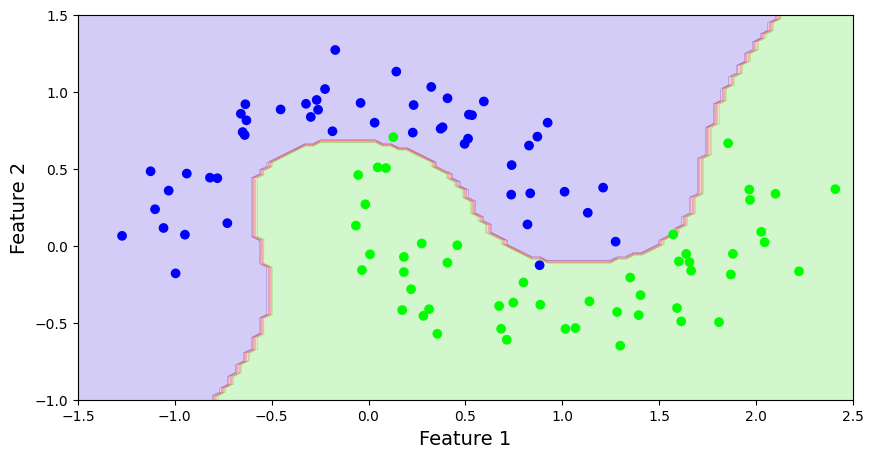

In [139]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))#3rd degree polynomial kernel
 ])
poly_kernel_svm_clf.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(10, 5))
plot_decision_boundary(poly_kernel_svm_clf, X, y, [-1.5, 2.5, -1, 1.5])


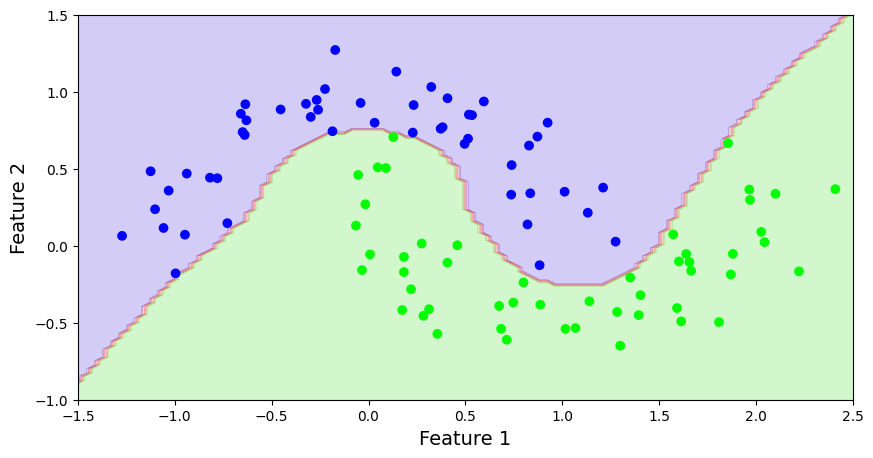

In [140]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))#10th degree polynomial kernel
 ])
poly_kernel_svm_clf.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(10, 5))
plot_decision_boundary(poly_kernel_svm_clf, X, y, [-1.5, 2.5, -1, 1.5])
#shows overfitting

it is underfitting, you can try increasing
it. The hyperparameter coef0 controls how much the model is influenced by highdegree polynomials versus low-degree polynomials.



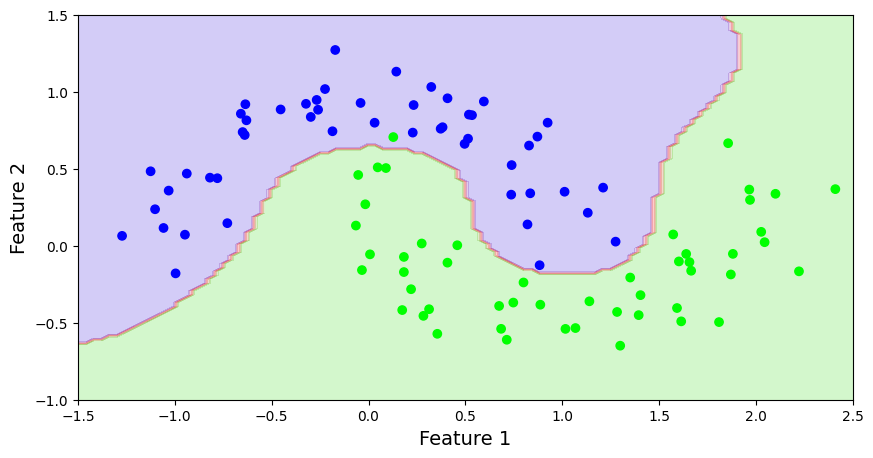

In [141]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", degree=1, coef0=1, C=100))
 ])
poly_kernel_svm_clf.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(10, 5))
plot_decision_boundary(poly_kernel_svm_clf, X, y, [-1.5, 2.5, -1, 1.5])

###Gaussian RBF Kernel

Another method to tackle the nonlinear problems is to add features using a similarity function (that measures how much each instance resembles a particular landmark). let’s define the similarity function to be the Gaussian Radial Basis Function (RBF)
with γ = 0.3

Gaussian RBF kernel makes it possible to obtain a similar
result as if you had added many similarity features, without actually having to add
them.

In [142]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

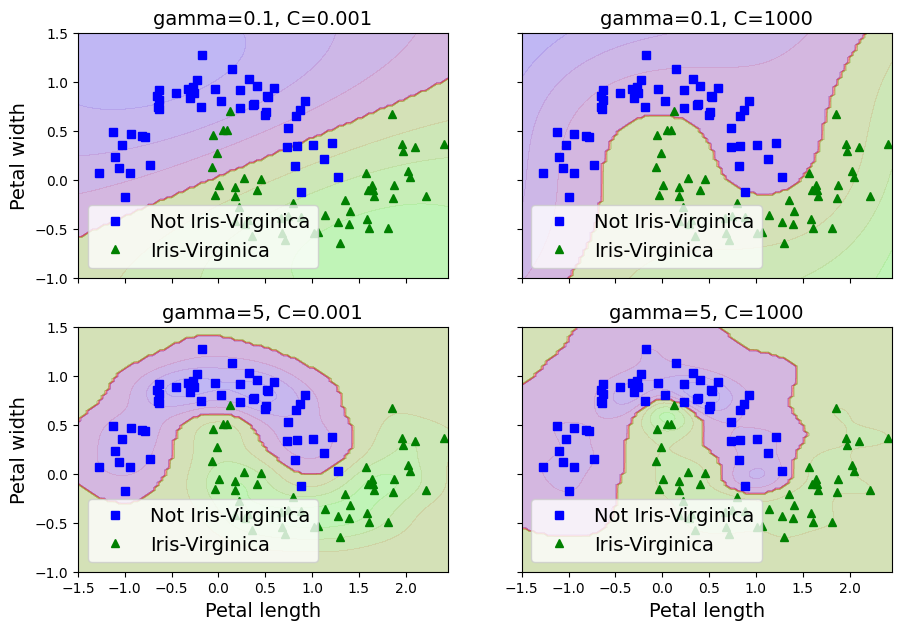

In [143]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])

    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])

    plot_dataset(X, y)
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()


γ acts like a regularization
hyperparameter: if your model is overfitting, you should reduce it, and if it is under‐
fitting, you should increase it.

using grid search to find hyperparameter values -

In [144]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV



# Define the parameter values that should be searched
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

# Create a base model
svc = svm.SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X, y)

# Now you can get the best parameters like this
print(grid_search.best_params_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


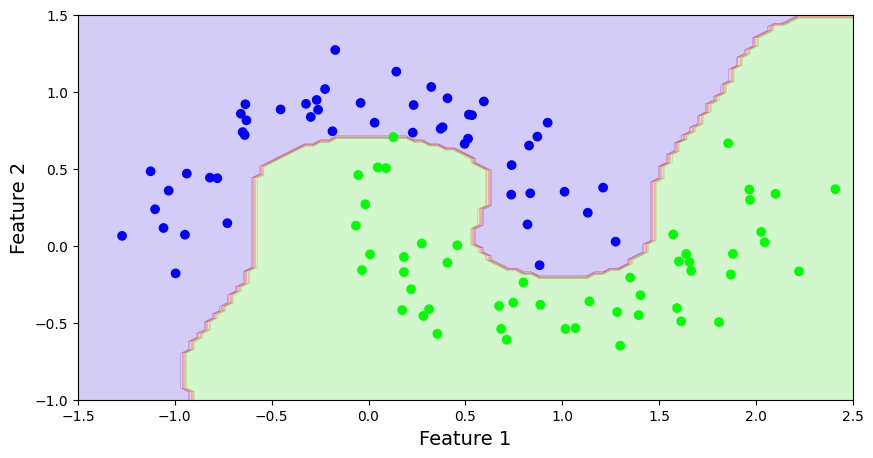

In [147]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=1, C=100))
rbf_kernel_svm_clf.fit(X, y)


# Plot the decision boundary
plt.figure(figsize=(10, 5))
plot_decision_boundary(rbf_kernel_svm_clf, X, y, [-1.5, 2.5, -1, 1.5])

###Support vector regression (SVR)

instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances on the street). The width of the street is controlled by a hyperparameter ϵ (tol)Adding more training instances within the margin does not affect the model’s predictions; thus, the model is said to be ϵ-insensitive.


In [175]:
from sklearn.svm import LinearSVR


svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

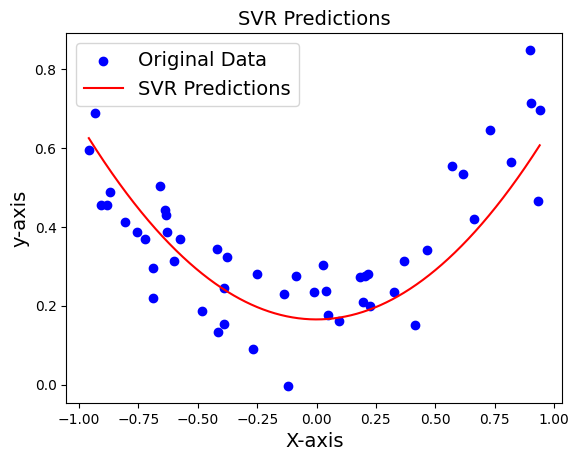

In [179]:
# extra code – these 3 lines generate a simple quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10


from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

# Ensure X and y are one-dimensional
X = np.array(X).flatten()
y = np.array(y).flatten()

# Generate data points for plotting
X_plot = np.linspace(min(X), max(X), 1000).reshape(-1, 1)

# Predict the corresponding y values using the SVR model
y_pred = svm_poly_reg.predict(X_plot)

# Plot the original data points
plt.scatter(X, y, label='Original Data', color='blue')

# Plot the SVR predictions
plt.plot(X_plot, y_pred, label='SVR Predictions', color='red')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.title('SVR Predictions')
plt.legend()

# Show the plot
plt.show()



In [176]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

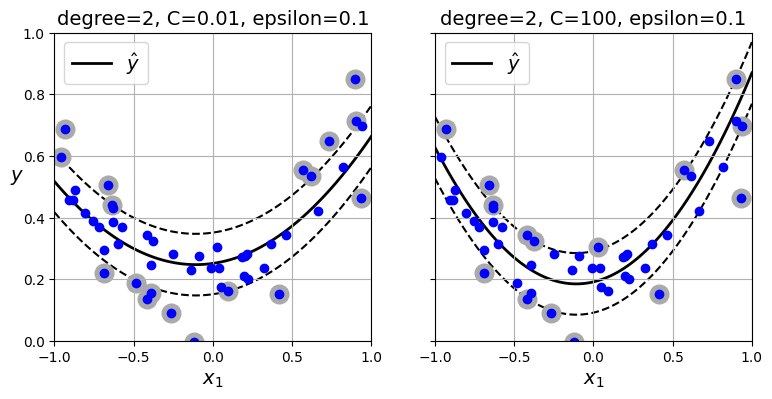

In [177]:
from sklearn.svm import SVR

# extra code – these 3 lines generate a simple quadratic dataset
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, "
          f"C={svm_poly_reg[-1].C}, "
          f"epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, "
          f"C={svm_poly_reg2[-1].C}, "
          f"epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()

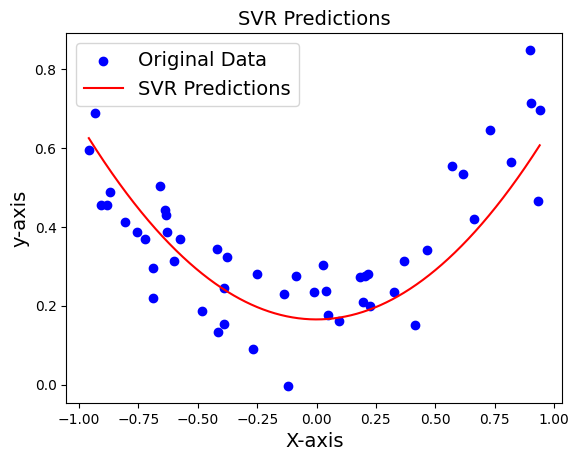

In [178]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

# Ensure X and y are one-dimensional
X = np.array(X).flatten()
y = np.array(y).flatten()

# Generate data points for plotting
X_plot = np.linspace(min(X), max(X), 1000).reshape(-1, 1)

# Predict the corresponding y values using the SVR model
y_pred = svm_poly_reg.predict(X_plot)

# Plot the original data points
plt.scatter(X, y, label='Original Data', color='blue')

# Plot the SVR predictions
plt.plot(X_plot, y_pred, label='SVR Predictions', color='red')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.title('SVR Predictions')
plt.legend()

# Show the plot
plt.show()

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model.

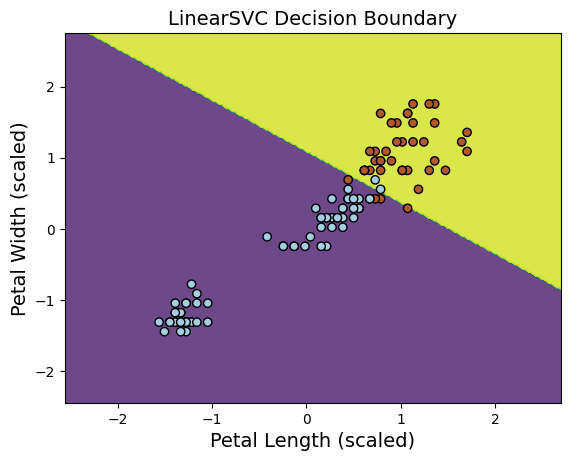

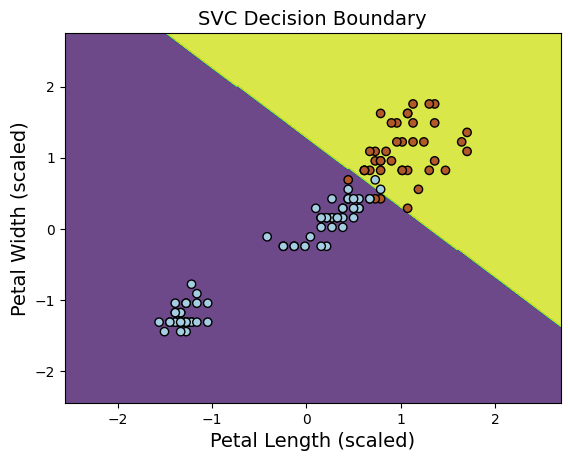

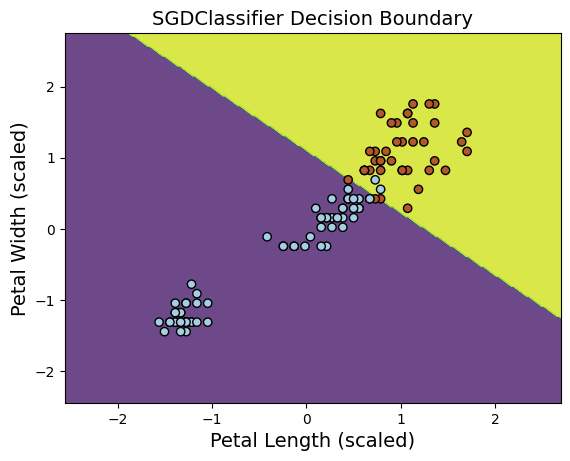

In [180]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length and width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a LinearSVC
linear_svc = LinearSVC(C=1, loss="hinge")
linear_svc.fit(X_train_scaled, y_train)

# Train an SVC with a linear kernel
svc = SVC(C=1, kernel="linear")
svc.fit(X_train_scaled, y_train)

# Train an SGDClassifier
sgd_classifier = SGDClassifier(loss="hinge", alpha=1/(len(X_train)), max_iter=1000, tol=1e-3, random_state=42)
sgd_classifier.fit(X_train_scaled, y_train)

# Evaluate the models
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Petal Length (scaled)')
    plt.ylabel('Petal Width (scaled)')
    plt.show()

# Plot decision boundaries for each model
plot_decision_boundary(linear_svc, X_train_scaled, y_train, 'LinearSVC Decision Boundary')
plot_decision_boundary(svc, X_train_scaled, y_train, 'SVC Decision Boundary')
plot_decision_boundary(sgd_classifier, X_train_scaled, y_train, 'SGDClassifier Decision Boundary')


Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?


In [190]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a smaller subset for hyperparameter tuning to speed up the process
X_train_tune, X_val, y_train_tune, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_tune_scaled = scaler.fit_transform(X_train_tune)
X_val_scaled = scaler.transform(X_val)

# Define the SVM classifier with a radial basis function (RBF) kernel
svm_clf = SVC(kernel="rbf", decision_function_shape="ovr", random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'gamma': [0.01, 0.1, 1],     # Kernel coefficient for 'rbf'
}

# Create the grid search instance
grid_search = GridSearchCV(svm_clf, param_grid, cv=3, n_jobs=-1)

# Perform grid search for hyperparameter tuning
grid_search.fit(X_train_tune_scaled, y_train_tune)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the SVM classifier with the best hyperparameters on the full training set
final_svm_clf = SVC(kernel="rbf", decision_function_shape="ovr", random_state=42, **best_params)
final_svm_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = final_svm_clf.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2%}")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: ignored

In [183]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the California housing dataset
california_housing = datasets.fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM regressor with a radial basis function (RBF) kernel
svm_regressor = SVR(kernel="rbf")

# Train the SVM regressor on the training set
svm_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 0.36
Root Mean Squared Error (RMSE): 0.60


In [184]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

from sklearn.svm import LinearSVR

lin_svr = make_pipeline(StandardScaler(), LinearSVR(dual=True, random_state=42))
lin_svr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

np.sqrt(mse)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9819256687727764

We will use randomized search with cross validation to find the appropriate hyperparameter values for C and gamma:

In [185]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_clf = make_pipeline(StandardScaler(), SVR())

param_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib,
                                   n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7afccb34e0e0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7afcd00e9e70>},
                   random_state=42)

In [186]:
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485979))])

In [189]:
from sklearn.model_selection import cross_val_score

-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

In [191]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.5854732265172238